# 🧪 AI-Guided SIR Modeling Hackathon (2 Hours)

This notebook is the **workshop skeleton** for the **AI-Guided SIR Modeling Hackathon**.

- Dataset: **Niamey, Niger measles outbreaks** (biweekly case counts; communities A/B/C)
- Tooling: **Google Colab + Python + ChatGPT**
- Time unit: **biweeks**
- Key modeling shortcut: infectious period ≈ **2 weeks** ⇒ **γ ≈ 1 per biweek**

---

## How to use this notebook
Each section contains:
1) A **ChatGPT prompt** (Markdown) you can copy into ChatGPT  
2) A **starter code cell** (often with TODOs) to run in Colab

✅ **Rule of thumb:** Always request **plots + sanity checks** when you ask ChatGPT for help.


## 0. Setup

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert epidemiological modeler and Python educator.

Task:
- Write a Colab-ready setup cell: imports, basic plotting config, and a helper for reproducibility.
- If any package is missing show me how to run pip install

Constraints:
- Use numpy, scipy, pandas, matplotlib only

Verification:
- Print library versions and a simple "ready" message.
```


In [1]:
# =========================
# Colab Setup Cell
# =========================

# --- If running in Colab and any package is missing, uncomment and run ---
# !pip install numpy scipy pandas matplotlib

# Core scientific stack
import numpy as np
import pandas as pd
import scipy
from scipy import integrate, optimize
import matplotlib.pyplot as plt

# -------------------------
# Reproducibility helper
# -------------------------
def set_seed(seed: int = 42):
    """
    Set random seed for reproducibility.
    Works for numpy-based simulations and optimization.
    """
    np.random.seed(seed)

set_seed(42)

# -------------------------
# Basic plotting config
# -------------------------
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 120,
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "legend.frameon": False,
    "font.size": 11,
})

# -------------------------
# Version check
# -------------------------
print("Library versions:")
print(f"  numpy      : {np.__version__}")
print(f"  pandas     : {pd.__version__}")
print(f"  scipy      : {scipy.__version__}")
print(f"  matplotlib : {plt.matplotlib.__version__}")

print("\nSetup complete — ready ✅")


Library versions:
  numpy      : 2.0.2
  pandas     : 2.2.2
  scipy      : 1.16.3
  matplotlib : 3.10.0

Setup complete — ready ✅


## 1. Explore the Niamey Measles Data:

### Load the dataset and compute basic statistics

#### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert epidemiological modeler and Python educator.

Context:
- Dataset contains biweekly measles case counts from Niamey, Niger
- File path: data/niamey.csv

Task:
Write Python code to:
1. Load data/niamey.csv store it to `measles_df`
2. Display the first few rows
3. Print column names and basic information about the dataset
4. Show basic statistics about dataset

Constraints
- Use pandas only
- Keep code simple and readable

```

In [2]:
import pandas as pd

# 1. Load the dataset
measles_df = pd.read_csv("data/niamey.csv")

# 2. Display the first few rows
print("First 5 rows of the dataset:")
print(measles_df.head())

# 3. Print column names and basic information
print("\nColumn names:")
print(measles_df.columns.tolist())

print("\nDataset information:")
print(measles_df.info())

# 4. Show basic statistics (numeric columns)
print("\nBasic statistics:")
print(measles_df.describe())

# 5. Show unique values for categorical columns
categorical_columns = measles_df.select_dtypes(include=["object", "category"]).columns

if len(categorical_columns) > 0:
    print("\nCategorical columns and their unique values:")
    for col in categorical_columns:
        print(f"\n{col}:")
        print(measles_df[col].unique())
else:
    print("\nNo categorical columns found.")


First 5 rows of the dataset:
   biweek community  measles
0       1         A     22.0
1       2         A     27.0
2       3         A     64.0
3       4         A     84.0
4       5         A    116.0

Column names:
['biweek', 'community', 'measles']

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   biweek     48 non-null     int64  
 1   community  48 non-null     object 
 2   measles    47 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB
None

Basic statistics:
          biweek      measles
count  48.000000    47.000000
mean    8.500000   232.531915
std     4.658554   316.792200
min     1.000000     0.000000
25%     4.750000    13.500000
50%     8.500000    81.000000
75%    12.250000   251.500000
max    16.000000  1041.000000

Categorical columns and their unique values:

community:
['A' 'B' 

### Exercise

// TODO: Participants write a prompt to explain the results in plain language


### Basic Plot

#### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert epidemiological modeler and Python educator.

Context:
- Dataset is already loaded into a DataFrame called `measles_df`
- Columns: biweek, community, measles

Task:
- Plot measles cases over time for each community
- Use one time-series plot
- Label axes and include a legend
- Briefly explain what biweekly case counts mean for epidemic modeling

```

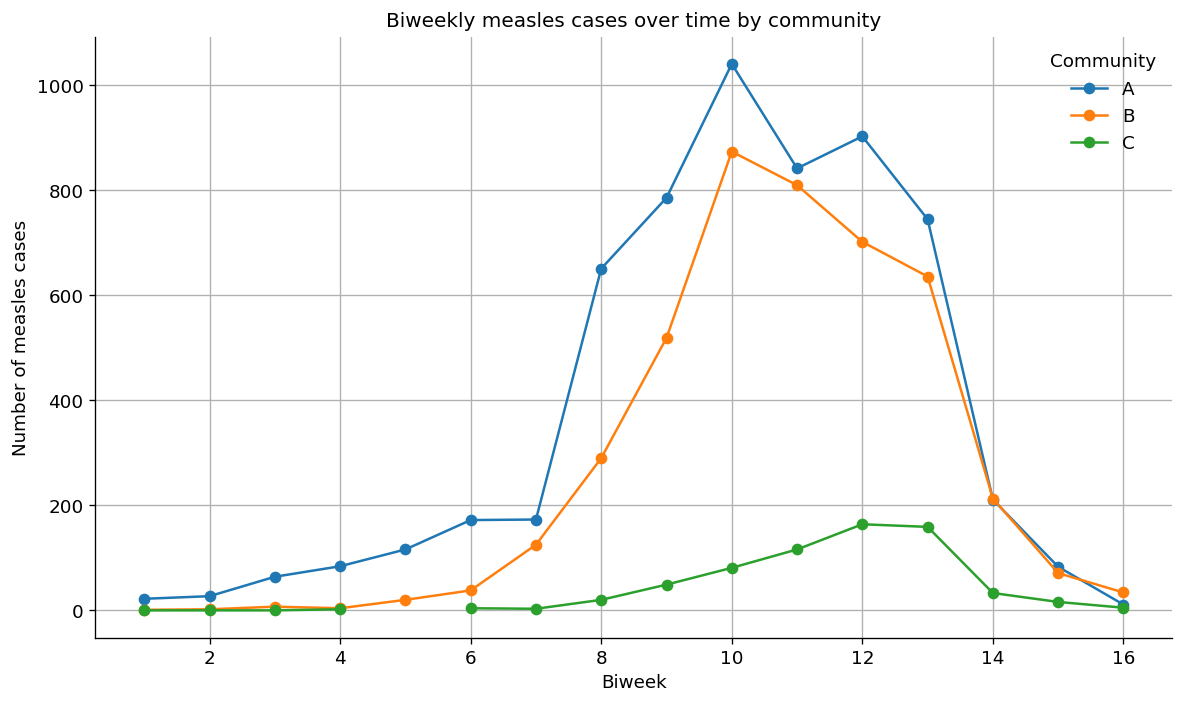

In [3]:
import matplotlib.pyplot as plt

# Plot measles cases over time for each community
plt.figure(figsize=(10, 6))

for community, df_group in measles_df.groupby("community"):
    plt.plot(
        df_group["biweek"],
        df_group["measles"],
        marker="o",
        label=community
    )

# Labels and legend
plt.xlabel("Biweek")
plt.ylabel("Number of measles cases")
plt.title("Biweekly measles cases over time by community")
plt.legend(title="Community")

plt.tight_layout()
plt.show()


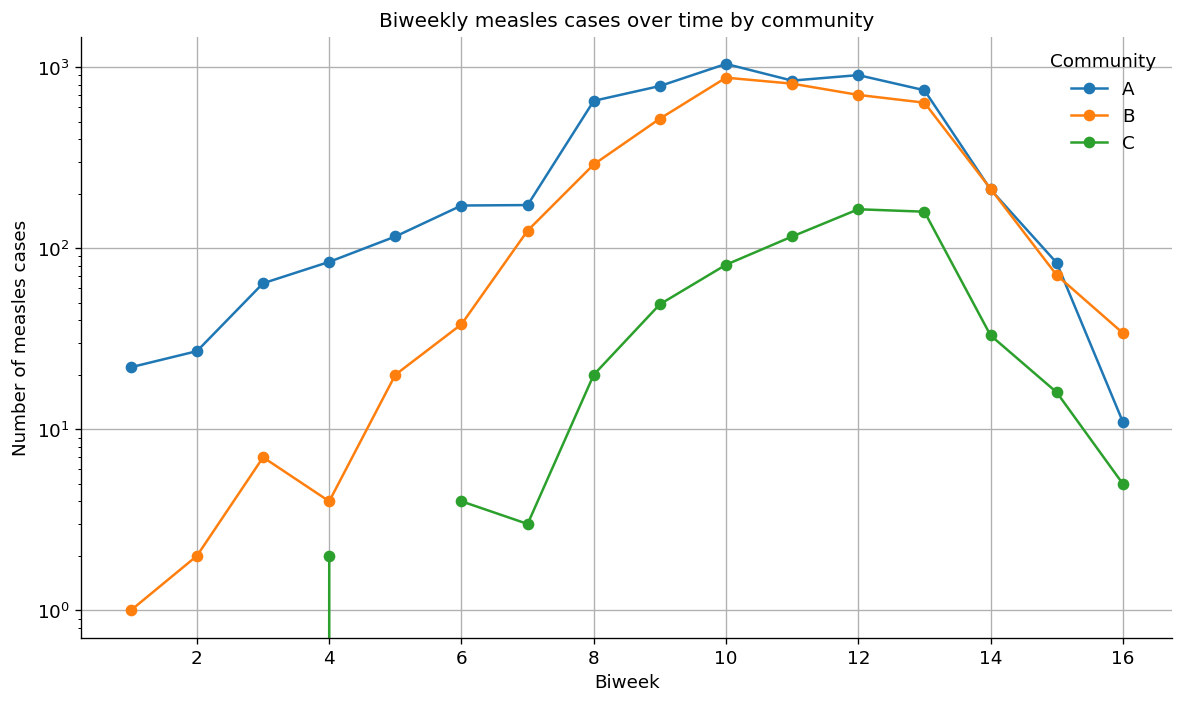

In [6]:
import matplotlib.pyplot as plt

# Plot measles cases over time for each community
plt.figure(figsize=(10, 6))

for community, df_group in measles_df.groupby("community"):
    plt.plot(
        df_group["biweek"],
        df_group["measles"],
        marker="o",
        label=community
    )
plt.yscale("log")
# Labels and legend
plt.xlabel("Biweek")
plt.ylabel("Number of measles cases")
plt.title("Biweekly measles cases over time by community")
plt.legend(title="Community")

plt.tight_layout()
plt.show()

## 2. Feature-Based Estimation: Early Growth (Quick R₀)

We estimate early exponential growth using a semi-log regression:
- Choose an early window where cases grow roughly exponentially.
- Fit `log(cases)` vs time.

### ChatGPT Prompt (copy/paste)
```text
## Persona

You are an **expert in infectious disease modeling**, with experience in early-outbreak analysis and interpretation of epidemic growth rates.

## Context

* **Disease:** Measles
* **Community:** A
* **Data:** Biweekly reported case counts
* **Epidemic phase:** Early outbreak (first ~8–10 biweeks), where case counts exhibit **exponential growth**
* **Dataset:** Already loaded as `measles_df`

### Dataset structure

`
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns:
- biweek     (int64)
- community  (object)
- measles    (float64, 47 non-null)
`

## Task

Estimate the **early exponential growth rate** of the outbreak by:

1. Selecting an appropriate **early biweek window** (≈ 8–10 biweeks)
2. Fitting a **log-linear model**: log(measles cases) vs. time
3. Producing a **semi-log plot** showing observed data and fitted exponential growth
4. Converting the estimated growth rate to an **approximate basic reproduction number (R₀)**, assuming:

   * Infectious removal rate: **γ = 1 per biweek**

## Constraints

* Use **NumPy** and **SciPy** only (Matplotlib for plotting is acceptable)
* Clearly **state and explain modeling assumptions**
* Print key **statistical results** (e.g., slope, confidence intervals if available, R₀)
* **Output code only** (do not execute)

## Verification / Expected Output

* A **semi-log plot** of measles cases with the fitted exponential curve
* Printed values for:

  * Estimated **growth rate (slope)**
  * Corresponding **R₀ estimate**
```


=== Early Exponential Growth (log-linear) ===
Community: A
Early window biweeks: [1, 10]
Points used (after dropping NA and < 1.0): n = 10

Model: log(cases_t) = a + r * t + error, where t is biweeks since window start
Estimated growth rate r (per biweek): 0.439208
95% CI for r: [0.373936, 0.504481]
R-squared: 0.9678
p-value (slope): 2.963e-07

R0 approximation:
Assumption: early phase S≈1 and SIR-like growth r ≈ β - γ, so R0 = β/γ ≈ 1 + r/γ
Using γ = 1.000 per biweek
Estimated R0: 1.4392
95% CI for R0 (from slope CI): [1.3739, 1.5045]


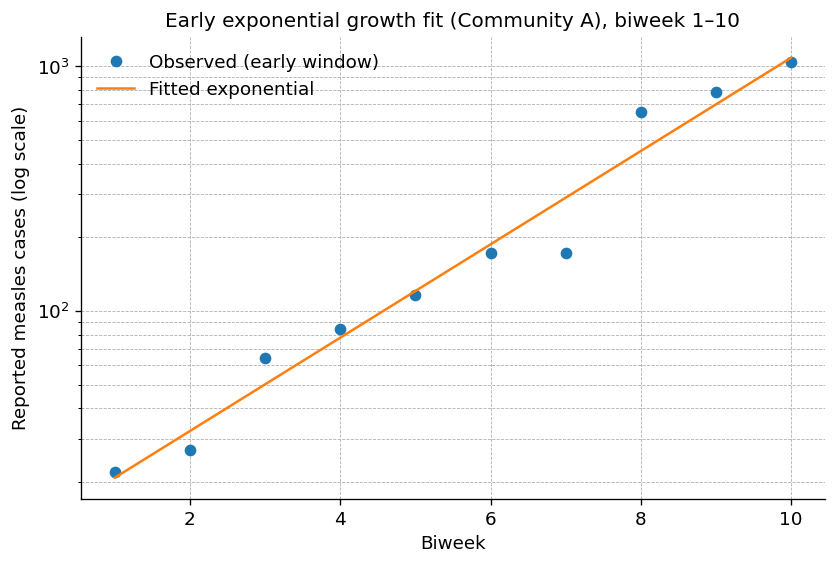

In [13]:
# Early exponential growth estimation for measles (Community A)
# Constraints: NumPy + SciPy only (Matplotlib OK). Code-only, no execution.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# User-adjustable settings
# -----------------------------
COMMUNITY = "A"

# Choose the early window length (in biweeks) OR explicit biweek range.
# Option 1 (recommended): first N biweeks from the first nonzero case
EARLY_N_BIWEEKS = 10          # try 8–10
START_AT_FIRST_POSITIVE = True

# Option 2: explicit inclusive biweek indices (overrides Option 1 if not None)
EARLY_BIWEEK_MIN = None      # e.g., 0
EARLY_BIWEEK_MAX = None      # e.g., 9

# Handling zeros / missing
MIN_CASES = 1.0              # exclude cases < MIN_CASES (avoids log(0))
ALPHA = 0.05                 # 95% CI

# R0 conversion assumption
GAMMA_PER_BIWEEK = 1.0       # infectious removal rate γ (per biweek)

# -----------------------------
# 1) Subset early window data
# -----------------------------
dfA = measles_df.loc[measles_df["community"] == COMMUNITY, ["biweek", "measles"]].copy()
dfA = dfA.dropna(subset=["measles"])

# Keep only positive (or >= MIN_CASES) counts for log fit
dfA = dfA.loc[dfA["measles"] >= MIN_CASES].copy()
dfA = dfA.sort_values("biweek")

if dfA.empty:
    raise ValueError("No data points with measles >= MIN_CASES in the selected community/window.")

# Determine early-window biweek bounds
if (EARLY_BIWEEK_MIN is not None) and (EARLY_BIWEEK_MAX is not None):
    bw_min, bw_max = int(EARLY_BIWEEK_MIN), int(EARLY_BIWEEK_MAX)
else:
    if START_AT_FIRST_POSITIVE:
        bw_min = int(dfA["biweek"].iloc[0])
    else:
        bw_min = int(dfA["biweek"].min())
    bw_max = bw_min + int(EARLY_N_BIWEEKS) - 1

early = dfA.loc[(dfA["biweek"] >= bw_min) & (dfA["biweek"] <= bw_max)].copy()
early = early.sort_values("biweek")

if early.shape[0] < 3:
    raise ValueError(
        f"Need at least 3 points to fit a log-linear model; got {early.shape[0]} "
        f"in window biweek [{bw_min}, {bw_max}]."
    )

# Use time in "biweeks since window start" for interpretability
t = (early["biweek"].to_numpy(dtype=float) - float(bw_min))
y = early["measles"].to_numpy(dtype=float)
logy = np.log(y)

# -----------------------------
# 2) Fit log-linear model: log(y) = a + r * t + error
#    r is the exponential growth rate per biweek
# -----------------------------
# stats.linregress uses ordinary least squares and returns slope, intercept, etc.
fit = stats.linregress(t, logy)
r_hat = float(fit.slope)         # growth rate per biweek
a_hat = float(fit.intercept)     # log-scale intercept
r_se = float(fit.stderr)         # standard error of slope (if available)
n = t.size
df = n - 2

# 95% CI for slope using Student-t
tcrit = stats.t.ppf(1 - ALPHA / 2, df)
r_ci = (r_hat - tcrit * r_se, r_hat + tcrit * r_se)

# -----------------------------
# 3) Convert growth rate to approximate R0
#    Assumption: SIR-like early phase with S ~ 1, growth rate r ≈ β - γ,
#    so R0 = β/γ ≈ (r + γ)/γ = 1 + r/γ
# -----------------------------
gamma = float(GAMMA_PER_BIWEEK)
R0_hat = 1.0 + (r_hat / gamma)
R0_ci = (1.0 + (r_ci[0] / gamma), 1.0 + (r_ci[1] / gamma))

# -----------------------------
# 4) Plot: semi-log (y on log-scale) with fitted exponential curve
# -----------------------------
# Smooth curve over the early window
t_grid = np.linspace(t.min(), t.max(), 200)
y_fit = np.exp(a_hat + r_hat * t_grid)

plt.figure(figsize=(8, 5))
plt.semilogy(early["biweek"], y, "o", label="Observed (early window)")
plt.semilogy(bw_min + t_grid, y_fit, "-", label="Fitted exponential")

plt.title(f"Early exponential growth fit (Community {COMMUNITY}), biweek {bw_min}–{bw_max}")
plt.xlabel("Biweek")
plt.ylabel("Reported measles cases (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# -----------------------------
# Print key results + assumptions
# -----------------------------
print("=== Early Exponential Growth (log-linear) ===")
print(f"Community: {COMMUNITY}")
print(f"Early window biweeks: [{bw_min}, {bw_max}]")
print(f"Points used (after dropping NA and < {MIN_CASES}): n = {n}")
print("")
print("Model: log(cases_t) = a + r * t + error, where t is biweeks since window start")
print(f"Estimated growth rate r (per biweek): {r_hat:.6f}")
print(f"95% CI for r: [{r_ci[0]:.6f}, {r_ci[1]:.6f}]")
print(f"R-squared: {fit.rvalue**2:.4f}")
print(f"p-value (slope): {fit.pvalue:.3e}")
print("")
print("R0 approximation:")
print("Assumption: early phase S≈1 and SIR-like growth r ≈ β - γ, so R0 = β/γ ≈ 1 + r/γ")
print(f"Using γ = {gamma:.3f} per biweek")
print(f"Estimated R0: {R0_hat:.4f}")
print(f"95% CI for R0 (from slope CI): [{R0_ci[0]:.4f}, {R0_ci[1]:.4f}]")

# If running in a notebook, show the plot:
# plt.show()


**Goal**
Assess how sensitive the estimated basic reproduction number (**R₀**) is to the choice of early-outbreak window length.

**Method (brief)**
For a sequence of increasing early-outbreak windows (measured in biweeks):

* Fit a log-linear model to early reported measles cases to estimate the exponential growth rate.
* Convert the growth rate to **R₀** assuming a fixed infectious removal rate (γ = 1 per biweek).
* Compute a 95% confidence interval for **R₀** from the regression uncertainty.
* Visualize **R₀** and its uncertainty as a function of the window length.

**Interpretation**
Stable **R₀** estimates across window lengths suggest a robust early-growth signal, while strong variation indicates sensitivity to window choice or departures from exponential growth.

---

### Continue with the this prompt

```text
For a range of early-outbreak window lengths, plot the estimated R₀ (derived from exponential growth rates) together with its 95% confidence interval, as a function of the initial period length (in biweeks).
```

Initial window (biweeks) | R0_hat | R0_CI_low | R0_CI_high
                      5 |  1.446 |      1.265 |       1.627
                      6 |  1.426 |      1.319 |       1.534
                      7 |  1.374 |      1.270 |       1.479
                      8 |  1.432 |      1.322 |       1.542
                      9 |  1.443 |      1.359 |       1.526
                     10 |  1.439 |      1.374 |       1.504
                     11 |  1.408 |      1.341 |       1.474
                     12 |  1.377 |      1.309 |       1.444


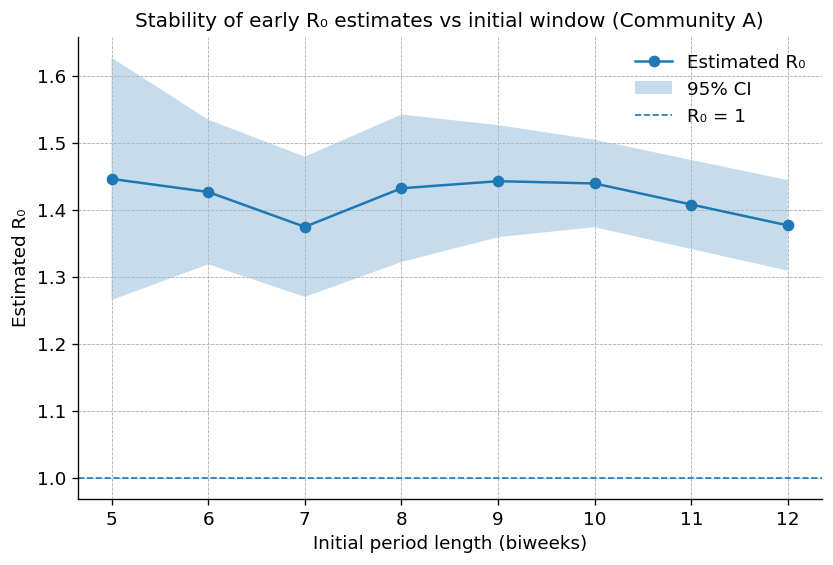

In [14]:
# Plot estimated R0 (with CI) versus initial-period length (number of biweeks)
# Constraints respected: NumPy, SciPy, Matplotlib only. Code-only.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# User-adjustable settings
# -----------------------------
COMMUNITY = "A"
MIN_CASES = 1.0
GAMMA_PER_BIWEEK = 1.0   # γ
ALPHA = 0.05             # 95% CI

# Range of early-window lengths to evaluate (in biweeks)
WINDOW_LENGTHS = np.arange(5, 13)   # e.g., 5–12 biweeks

# -----------------------------
# Prepare data
# -----------------------------
dfA = measles_df.loc[measles_df["community"] == COMMUNITY, ["biweek", "measles"]].copy()
dfA = dfA.dropna(subset=["measles"])
dfA = dfA.loc[dfA["measles"] >= MIN_CASES].copy()
dfA = dfA.sort_values("biweek")

if dfA.shape[0] < WINDOW_LENGTHS.max():
    raise ValueError("Not enough positive observations to cover the largest window length.")

# Start window at first positive case
bw_start = int(dfA["biweek"].iloc[0])

# Storage
R0_hat_list = []
R0_lo_list = []
R0_hi_list = []

# -----------------------------
# Loop over window lengths
# -----------------------------
for L in WINDOW_LENGTHS:
    bw_end = bw_start + int(L) - 1
    early = dfA.loc[(dfA["biweek"] >= bw_start) & (dfA["biweek"] <= bw_end)].copy()
    early = early.sort_values("biweek")

    if early.shape[0] < 3:
        R0_hat_list.append(np.nan)
        R0_lo_list.append(np.nan)
        R0_hi_list.append(np.nan)
        continue

    t = (early["biweek"].to_numpy(dtype=float) - float(bw_start))
    y = early["measles"].to_numpy(dtype=float)
    logy = np.log(y)

    fit = stats.linregress(t, logy)
    r_hat = float(fit.slope)
    r_se = float(fit.stderr)
    df = t.size - 2
    tcrit = stats.t.ppf(1 - ALPHA / 2, df)

    r_ci = (r_hat - tcrit * r_se, r_hat + tcrit * r_se)

    # R0 ≈ 1 + r / γ
    R0_hat = 1.0 + r_hat / GAMMA_PER_BIWEEK
    R0_ci = (1.0 + r_ci[0] / GAMMA_PER_BIWEEK,
             1.0 + r_ci[1] / GAMMA_PER_BIWEEK)

    R0_hat_list.append(R0_hat)
    R0_lo_list.append(R0_ci[0])
    R0_hi_list.append(R0_ci[1])

R0_hat_arr = np.array(R0_hat_list)
R0_lo_arr = np.array(R0_lo_list)
R0_hi_arr = np.array(R0_hi_list)

# -----------------------------
# Plot R0 vs initial-period length
# -----------------------------
plt.figure(figsize=(8, 5))

plt.plot(WINDOW_LENGTHS, R0_hat_arr, marker="o", label="Estimated R₀")
plt.fill_between(
    WINDOW_LENGTHS,
    R0_lo_arr,
    R0_hi_arr,
    alpha=0.25,
    label="95% CI"
)

plt.axhline(1.0, linestyle="--", linewidth=1, label="R₀ = 1")

plt.xlabel("Initial period length (biweeks)")
plt.ylabel("Estimated R₀")
plt.title(f"Stability of early R₀ estimates vs initial window (Community {COMMUNITY})")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()

# If running interactively:
# plt.show()

# -----------------------------
# Print table of results
# -----------------------------
print("Initial window (biweeks) | R0_hat | R0_CI_low | R0_CI_high")
for L, r0, lo, hi in zip(WINDOW_LENGTHS, R0_hat_arr, R0_lo_arr, R0_hi_arr):
    print(f"{L:>23d} | {r0:6.3f} | {lo:10.3f} | {hi:11.3f}")


## 3. Implement the SIR Model (Biweekly Units)

We use a **closed SIR** model for a single outbreak wave:
- S(t): susceptible
- I(t): infectious
- R(t): recovered

Time unit = **biweeks**.

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert epidemiological modeler and Python educator.

Context:
- Closed SIR model (no birth or death)
- Time unit: biweeks
- Infectious period ≈ 2 weeks (gamma ≈ 1 per biweek)

Task:
Implement an SIR model using SciPy ODE solving:
- Define the SIR equations, the function name should be `sir_rhs`
- Solve over a biweekly time grid, put it in the function `simulate_sir`
- Plot S, I, R over time

Constraints:
- Use scipy.integrate.solve_ivp
- Keep code readable and commented

Verification:
- Plot S, I, R
- Verify S + I + R ≈ N
```


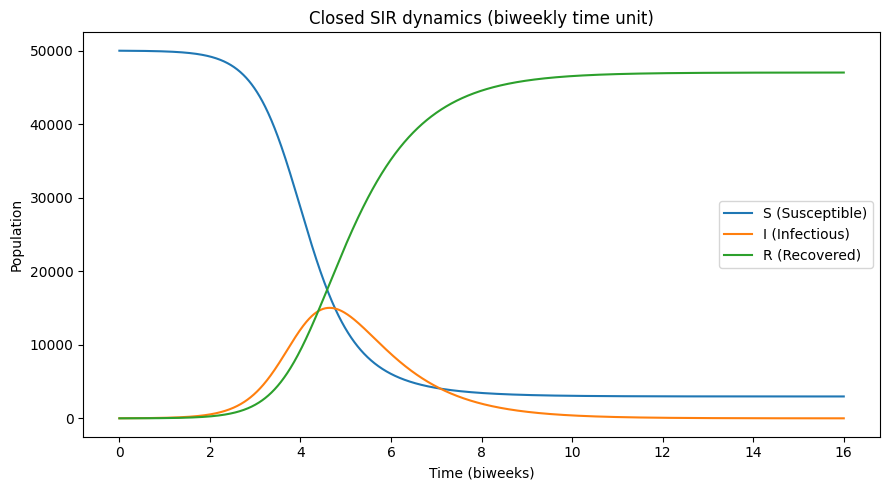

Max |S+I+R - N| = 0.000000
Max relative error = 2.910e-16


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# SIR model (closed population)
# -----------------------------
def sir_rhs(t, y, beta, gamma, N):
    """
    Right-hand side of the SIR ODE system.

    Parameters
    ----------
    t : float
        Time (biweeks). Included for solve_ivp API; not used explicitly here.
    y : array-like, shape (3,)
        State vector [S, I, R].
    beta : float
        Transmission rate per biweek.
    gamma : float
        Recovery rate per biweek (≈ 1 if infectious period ≈ 1 biweek).
    N : float
        Total population size (constant).

    Returns
    -------
    dydt : list[float]
        Derivatives [dS/dt, dI/dt, dR/dt].
    """
    S, I, R = y
    # Force of infection: beta * (I / N)
    lam = beta * I / N

    dS = -lam * S
    dI = lam * S - gamma * I
    dR = gamma * I
    return [dS, dI, dR]


def simulate_sir(beta, gamma, N, I0, R0=0.0, t_end=20, dt=1.0):
    """
    Simulate the SIR model on a biweekly time grid using solve_ivp.

    Parameters
    ----------
    beta : float
        Transmission rate per biweek.
    gamma : float
        Recovery rate per biweek.
    N : float
        Total population size.
    I0 : float
        Initial infectious individuals.
    R0 : float, optional
        Initial recovered individuals (default 0).
    t_end : float, optional
        End time (biweeks).
    dt : float, optional
        Time step for output grid (biweeks). For biweekly reporting, dt=1.

    Returns
    -------
    t : ndarray
        Time grid (biweeks).
    S, I, R : ndarrays
        Trajectories over time.
    """
    S0 = N - I0 - R0
    y0 = [S0, I0, R0]

    t_eval = np.arange(0, t_end + 1e-9, dt)

    sol = solve_ivp(
        fun=lambda t, y: sir_rhs(t, y, beta=beta, gamma=gamma, N=N),
        t_span=(t_eval[0], t_eval[-1]),
        y0=y0,
        t_eval=t_eval,
        method="RK45",
        rtol=1e-7,
        atol=1e-9,
    )

    if not sol.success:
        raise RuntimeError(f"ODE solve failed: {sol.message}")

    S, I, R = sol.y
    return sol.t, S, I, R


# -----------------------------
# Demo / verification
# -----------------------------
# Biweek time unit: infectious period ≈ 2 weeks -> gamma ≈ 1 per biweek
gamma = 1.0

# Choose beta so R0 = beta/gamma is in a reasonable range.
# Example: R0 ~ 2.5 -> beta = 2.5
beta = 3

# Initial conditions
N = 50_000
I0 = 10
R0_init = 0.0

# Simulate for 20 biweeks
t, S, I, R = simulate_sir(beta=beta, gamma=gamma, N=N, I0=I0, R0=R0_init, t_end=16, dt=0.01)

# Plot S, I, R
plt.figure(figsize=(9, 5))
plt.plot(t, S, label="S (Susceptible)")
plt.plot(t, I, label="I (Infectious)")
plt.plot(t, R, label="R (Recovered)")
plt.xlabel("Time (biweeks)")
plt.ylabel("Population")
plt.title("Closed SIR dynamics (biweekly time unit)")
plt.legend()
plt.tight_layout()
plt.show()

# Verify conservation: S + I + R ≈ N
total = S + I + R
max_abs_err = np.max(np.abs(total - N))
max_rel_err = max_abs_err / N

print(f"Max |S+I+R - N| = {max_abs_err:.6f}")
print(f"Max relative error = {max_rel_err:.3e}")


## 4. Map Model Output to Observations (Incidence via ΔH)

Observed data are **biweekly case counts**, not the state `I(t)`.  
We model **incidence** using an accumulator:

- Add `H(t)` with **dH/dt = β S I / N**  
- Predicted biweekly counts ≈ **ΔH** over each biweek interval

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert epidemic modeler.

Context:
- Observed data are biweekly case counts (incidence)
- SIR model outputs states

Task:
Extend the SIR model by:
- Adding H(t) with dH/dt = beta*S*I/N
- Computing predicted biweekly cases as ΔH aligned to biweeks

Constraints:
- Keep code minimal and readable

Verification:
- Plot predicted ΔH
- Explain why ΔH matches count data
```


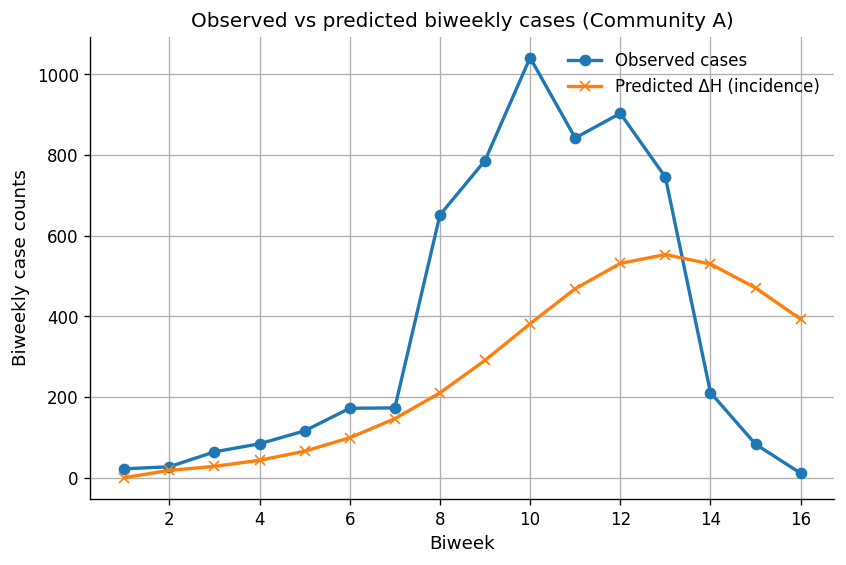

In [ ]:
def sirH_rhs(t, y, beta, gamma, N):
    """SIR + incidence accumulator H.
    y = [S, I, R, H]
    dH/dt = new infections per biweek
    """
    S, I, R, H = y
    incidence = beta * S * I / N
    dS = -incidence
    dI = incidence - gamma * I
    dR = gamma * I
    dH = incidence
    return [dS, dI, dR, dH]

def simulate_sir_incidence(biweeks, beta, gamma, N, I0, R0=0.0):
    """Simulate SIRH at specific biweek time points and return ΔH per interval."""
    S0 = N - I0 - R0
    t_eval = np.array(biweeks, dtype=float)
    sol = solve_ivp(
        fun=lambda t, y: sirH_rhs(t, y, beta=beta, gamma=gamma, N=N),
        t_span=(float(np.min(t_eval)), float(np.max(t_eval))),
        y0=[S0, I0, R0, 0.0],
        t_eval=t_eval,
        rtol=1e-6,
        atol=1e-9,
    )
    if not sol.success:
        raise RuntimeError(sol.message)
    S, I, R, H = sol.y
    dH = np.diff(H, prepend=H[0])  # first interval as 0
    return S, I, R, H, dH

# Example: predicted ΔH on the same biweek grid as the data for community A
biweeks_A = dfA["biweek"].values
N=10000
S_A, I_A, R_A, H_A, dH_A = simulate_sir_incidence(
    biweeks=biweeks_A,
    beta=max(beta0, 1e-6),
    gamma=gamma,
    N=N,
    I0=I0,
)

plt.figure()
plt.plot(biweeks_A, dfA["measles"].values, marker="o", label="Observed cases")
plt.plot(biweeks_A, dH_A, marker="x", label="Predicted ΔH (incidence)")
plt.xlabel("Biweek")
plt.ylabel("Biweekly case counts")
plt.title("Observed vs predicted biweekly cases (Community A)")
plt.grid(True)
plt.legend()
plt.show()


## 5. Fit Parameters by Least Squares

We fit parameters by minimizing squared error between observed counts and predicted ΔH.

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert in numerical optimization for epidemic models.

Context:
- Observed data: biweekly measles case counts (incidence)
- Model prediction: ΔH from SIR + accumulator
- Time unit: biweeks

Task:
Fit beta (and optionally I0) by least squares:
- Use good initialization from early-growth estimates
- Use reasonable bounds
- Plot observed vs fitted cases

Constraints:
- Use scipy.optimize.least_squares
- Keep runtime suitable for a workshop

Verification:
- Overlay plot
- Print best-fit parameter values and SSE
```


Least squares fit (Community A)
beta_hat: 1.6763668834057475
I0_hat: 6.44903746138203
SSE: 198993.43624858736


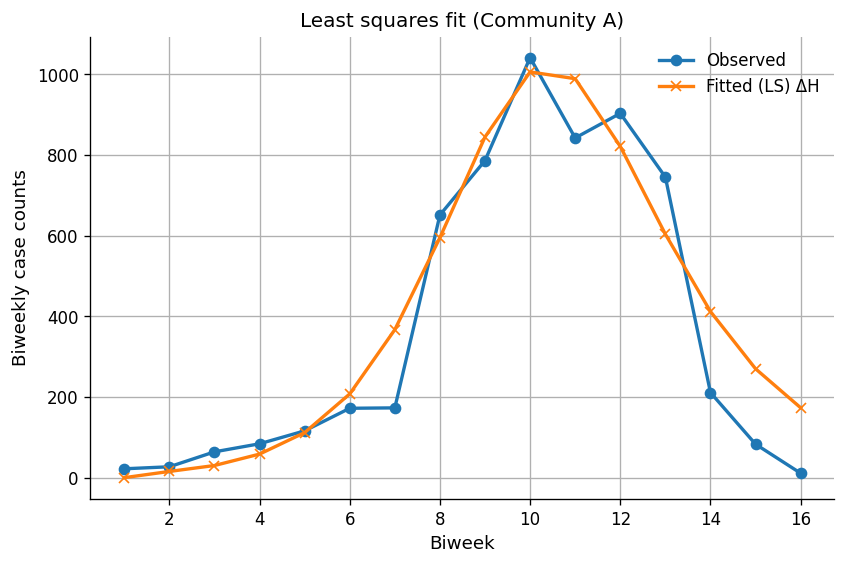

In [ ]:
def fit_least_squares(df_comm, N, gamma=1.0, beta_init=3.0, I0_init=10.0):
    biweeks = df_comm["biweek"].values.astype(float)
    y_obs = df_comm["measles"].values.astype(float)

    def residuals(theta):
        # theta = [log_beta, log_I0]
        log_beta, log_I0 = theta
        beta = np.exp(log_beta)
        I0 = np.exp(log_I0)
        _, _, _, _, dH = simulate_sir_incidence(biweeks, beta=beta, gamma=gamma, N=N, I0=I0)
        return (dH - y_obs)

    x0 = np.log([max(beta_init, 1e-6), max(I0_init, 1e-6)])
    res = least_squares(
        residuals,
        x0=x0,
        bounds=(np.log([1e-6, 1e-6]), np.log([1e3, 1e6])),
        max_nfev=200,
    )
    beta_hat, I0_hat = np.exp(res.x)
    return beta_hat, I0_hat, res

beta_ls, I0_ls, res_ls = fit_least_squares(dfA, N=N, gamma=gamma, beta_init=beta0, I0_init=I0)
print("Least squares fit (Community A)")
print("beta_hat:", beta_ls)
print("I0_hat:", I0_ls)
print("SSE:", np.sum(res_ls.fun**2))

_, _, _, _, dH_fit = simulate_sir_incidence(dfA["biweek"].values, beta=beta_ls, gamma=gamma, N=N, I0=I0_ls)

plt.figure()
plt.plot(dfA["biweek"], dfA["measles"], marker="o", label="Observed")
plt.plot(dfA["biweek"], dH_fit, marker="x", label="Fitted (LS) ΔH")
plt.xlabel("Biweek")
plt.ylabel("Biweekly case counts")
plt.title("Least squares fit (Community A)")
plt.grid(True)
plt.legend()
plt.show()


## 6. Poisson Likelihood Inference (Counts)

For count data:
- \( y_t \sim \text{Poisson}(\mu_t) \)
- \( \mu_t = \rho \cdot \Delta H_t \)

where **ρ** is a reporting/ascertainment fraction.

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert in statistical inference for epidemic models.

Context:
- Observed data are biweekly count data
- Poisson errors are appropriate
- μ_t = rho * ΔH_t
- Time unit: biweeks

Task:
Implement MLE under Poisson likelihood:
- Use parameter transforms (log for beta, logit for rho, log for I0)
- Optimize negative log-likelihood
- Plot observed vs expected counts

Constraints:
- Use scipy.optimize.minimize
- Keep runtime suitable for a workshop

Verification:
- Overlay plot of observed vs expected
- Print MLE estimates and log-likelihood
```


Poisson MLE (Community A)
beta_hat: 1.7498294222891901
I0_hat: 4.45356425141387
rho_hat: 0.8555628500284184
NLL: 1050.8966402039698
Converged: True


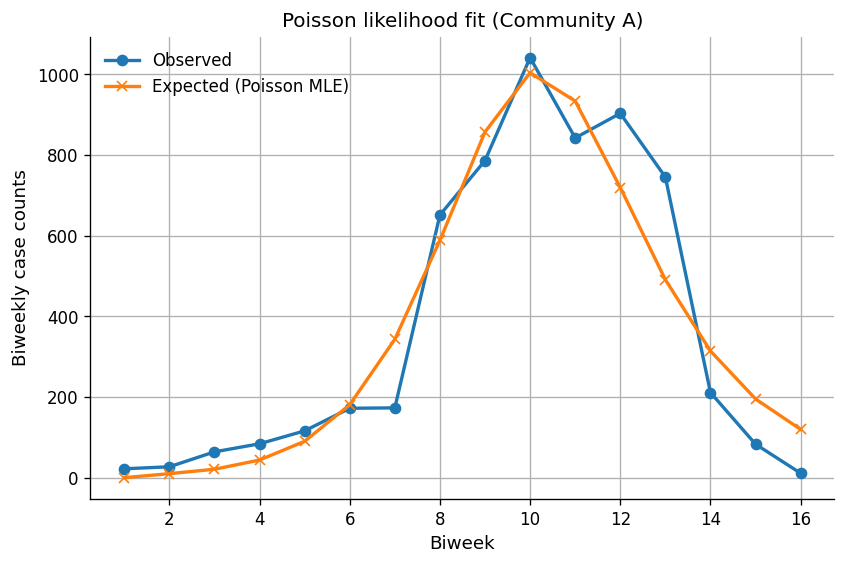

In [ ]:
from scipy.special import gammaln

def logit(p):
    p = np.clip(p, 1e-9, 1-1e-9)
    return np.log(p/(1-p))

def inv_logit(x):
    return 1/(1+np.exp(-x))

def poisson_nll(y, mu):
    mu = np.clip(mu, 1e-12, None)
    return np.sum(mu - y*np.log(mu) + gammaln(y + 1))

def fit_poisson_mle(df_comm, N, gamma=1.0, beta_init=3.0, I0_init=10.0, rho_init=0.2):
    biweeks = df_comm["biweek"].values.astype(float)
    y_obs = df_comm["measles"].values.astype(float)

    def objective(theta):
        # theta = [log_beta, log_I0, logit_rho]
        log_beta, log_I0, logit_rho = theta
        beta = np.exp(log_beta)
        I0 = np.exp(log_I0)
        rho = inv_logit(logit_rho)

        _, _, _, _, dH = simulate_sir_incidence(biweeks, beta=beta, gamma=gamma, N=N, I0=I0)
        mu = rho * dH
        return poisson_nll(y_obs, mu)

    x0 = np.array([np.log(max(beta_init, 1e-6)), np.log(max(I0_init, 1e-6)), logit(rho_init)], dtype=float)

    res = minimize(
        objective,
        x0=x0,
        method="Nelder-Mead",
        options=dict(maxiter=1500, xatol=1e-6, fatol=1e-6),
    )

    log_beta, log_I0, logit_rho = res.x
    beta_hat = np.exp(log_beta)
    I0_hat = np.exp(log_I0)
    rho_hat = inv_logit(logit_rho)

    nll = objective(res.x)
    return beta_hat, I0_hat, rho_hat, nll, res

beta_mle, I0_mle, rho_mle, nll_mle, res_mle = fit_poisson_mle(
    dfA, N=N, gamma=gamma, beta_init=beta_ls, I0_init=I0_ls, rho_init=0.2
)

print("Poisson MLE (Community A)")
print("beta_hat:", beta_mle)
print("I0_hat:", I0_mle)
print("rho_hat:", rho_mle)
print("NLL:", nll_mle)
print("Converged:", res_mle.success)

_, _, _, _, dH_mle = simulate_sir_incidence(dfA["biweek"].values, beta=beta_mle, gamma=gamma, N=N, I0=I0_mle)
mu_mle = rho_mle * dH_mle

plt.figure()
plt.plot(dfA["biweek"], dfA["measles"], marker="o", label="Observed")
plt.plot(dfA["biweek"], mu_mle, marker="x", label="Expected (Poisson MLE)")
plt.xlabel("Biweek")
plt.ylabel("Biweekly case counts")
plt.title("Poisson likelihood fit (Community A)")
plt.grid(True)
plt.legend()
plt.show()


## 7. Quick Uncertainty: Profile Likelihood for β (Optional)

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are an expert in likelihood-based inference.

Context:
- We already have a Poisson likelihood fit
- We want uncertainty for beta

Task:
Create a profile likelihood for beta:
1) Fix beta over a grid
2) Optimize I0 and rho for each beta
3) Plot profile NLL(beta)

Constraints:
- Keep runtime reasonable for a workshop

Verification:
- Profile plot
- Explain how to interpret the uncertainty
```


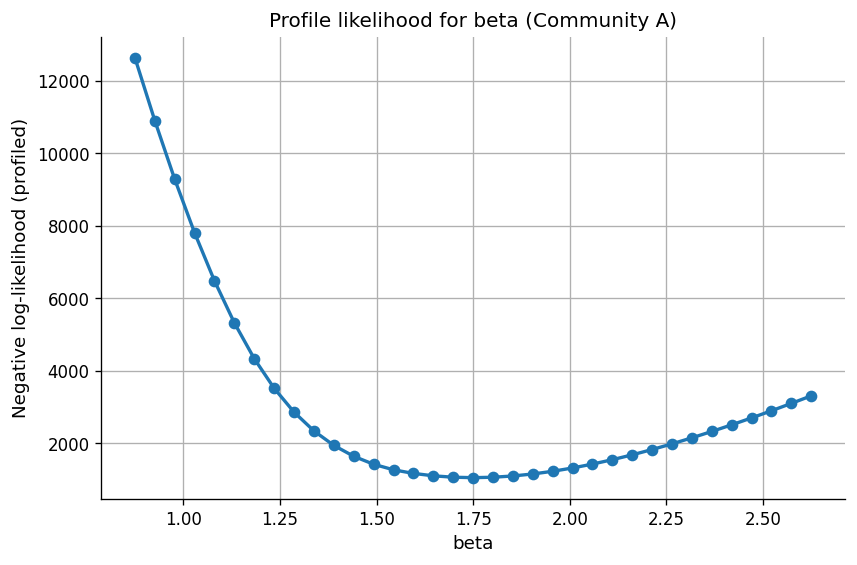

Min NLL: 1050.8966402037995 at beta ≈ 1.74982942228919


In [ ]:
def profile_beta(df_comm, N, gamma, beta_grid, I0_init, rho_init):
    biweeks = df_comm["biweek"].values.astype(float)
    y_obs = df_comm["measles"].values.astype(float)

    def objective_I0_rho(theta, beta_fixed):
        # theta = [log_I0, logit_rho]
        log_I0, logit_rho = theta
        I0 = np.exp(log_I0)
        rho = inv_logit(logit_rho)
        _, _, _, _, dH = simulate_sir_incidence(biweeks, beta=beta_fixed, gamma=gamma, N=N, I0=I0)
        mu = rho * dH
        return poisson_nll(y_obs, mu)

    nlls = []
    for b in beta_grid:
        x0 = np.array([np.log(max(I0_init, 1e-6)), logit(rho_init)], dtype=float)
        res = minimize(
            lambda th: objective_I0_rho(th, beta_fixed=b),
            x0=x0,
            method="Nelder-Mead",
            options=dict(maxiter=800, xatol=1e-6, fatol=1e-6),
        )
        nlls.append(objective_I0_rho(res.x, beta_fixed=b))
    return np.array(nlls)

beta_grid = np.linspace(max(1e-6, 0.5*beta_mle), 1.5*beta_mle, 35)
nll_prof = profile_beta(dfA, N=N, gamma=gamma, beta_grid=beta_grid, I0_init=I0_mle, rho_init=rho_mle)

plt.figure()
plt.plot(beta_grid, nll_prof, marker="o")
plt.xlabel("beta")
plt.ylabel("Negative log-likelihood (profiled)")
plt.title("Profile likelihood for beta (Community A)")
plt.grid(True)
plt.show()

print("Min NLL:", nll_prof.min(), "at beta ≈", beta_grid[np.argmin(nll_prof)])


## 8. Generate a Markdown Summary (Hackathon Report Cell)

### ChatGPT Prompt (copy/paste)
```text
Persona:
You are preparing a short scientific report for hackathon participants.

Context:
- We modeled biweekly measles case counts in Niamey (community A)
- We used a closed SIR model with gamma ≈ 1 per biweek
- We estimated beta and rho via Poisson likelihood

Task:
Write a Markdown summary including:
- Model setup and key assumptions
- Parameter estimates (beta, gamma, rho) and R0
- Observed vs fitted comparison (brief interpretation)
- Key limitations
- Next steps (SEIR, time-varying beta, stochasticity)

Constraints:
- Scientific but accessible
- Use headers + bullet points
```


In [ ]:
# TODO: Paste ChatGPT-generated Markdown summary below this line (or create a new Markdown cell).
summary = f'''
## Hackathon Summary (Community A)

**Data:** Biweekly measles case counts (Niamey, Niger), Community A
**Model:** Closed SIR with incidence accumulator (ΔH)
**Time unit:** biweeks
**Assumed recovery rate:** γ = {gamma:.3g} per biweek

### Estimated parameters
- β (Poisson MLE): **{beta_mle:.4g}**
- ρ (Poisson MLE): **{rho_mle:.4g}**
- Approx R₀ = β/γ: **{(beta_mle/gamma):.4g}**

### Notes
- ΔH was used to map model infections to observed case counts.
- Fit quality should be assessed visually (Observed vs Expected plot) and via NLL.

### Next steps
- Fit communities B and C
- Compare Poisson vs Negative Binomial (overdispersion)
- Try SEIR or time-varying β(t)
'''
print(summary)



## Hackathon Summary (Community A)

**Data:** Biweekly measles case counts (Niamey, Niger), Community A  
**Model:** Closed SIR with incidence accumulator (ΔH)  
**Time unit:** biweeks  
**Assumed recovery rate:** γ = 1 per biweek

### Estimated parameters
- β (Poisson MLE): **1.75**
- ρ (Poisson MLE): **0.8556**
- Approx R₀ = β/γ: **1.75**

### Notes
- ΔH was used to map model infections to observed case counts.
- Fit quality should be assessed visually (Observed vs Expected plot) and via NLL.

### Next steps
- Fit communities B and C
- Compare Poisson vs Negative Binomial (overdispersion)
- Try SEIR or time-varying β(t)

